In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [34]:
df = pd.read_csv("Steel_industry_data.csv")
df_clean = df.copy()

In [35]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [36]:
df.shape

(35040, 11)

In [37]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [39]:
df.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [40]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(35040, 11)
(35040, 11)


### Dataset bu ana kadar gördüğümüz üzere null değer içermeyen , aynı satır bulunmayan bir dataset. df.describe tablosunu da incelediğimiz zaman herhangi bir anomali görünmemekte. Bu yüzeysel incelemeden sonra her bir kolonu ayrı ayrı incelemeye geçelim.

In [41]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [42]:
categoric_cols = [col for col in df.columns if df[col].dtype == "O"]

numeric_cols = [col for col in df.columns if df[col].dtype != "O"]

print(categoric_cols)
print(numeric_cols)

['date', 'WeekStatus', 'Day_of_week', 'Load_Type']
['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


In [ ]:
#Her bir numeric kolonu analiz etmek için bir fonksiyon yazdık. Sonrasında for döngüsü içersinde bu fonksiyonu kullanarak her bir kolonu detaylı bir şekilde inceleyebilir ve hakkında yorum yapabiliriz.



def analyze_column(df, column_name):
    
    
    print("="*80)
    print(f" KOLON ANALİZİ: {column_name}")
    print("="*80)
    
    print("\n1️ İSTATİSTİKSEL ÖZET:")
    print("-"*50)
    data = df[column_name]
    
    print(f"Veri Sayısı:     {len(data):,}")
    print(f"Minimum:         {data.min():.2f}")
    print(f"Maksimum:        {data.max():.2f}")
    print(f"Ortalama:        {data.mean():.2f}")
    print(f"Medyan:          {data.median():.2f}")
    print(f"Std Sapma:       {data.std():.2f}")
    print(f"Varyans:         {data.var():.2f}")
    print(f"Skewness:        {data.skew():.2f}")
    print(f"Kurtosis:        {data.kurtosis():.2f}")
    
   
    print(f"\nYüzdelik Dilimler:")
    print(f"  25%:  {data.quantile(0.25):.2f}")
    print(f"  50%:  {data.quantile(0.50):.2f}")
    print(f"  75%:  {data.quantile(0.75):.2f}")
    print(f"  95%:  {data.quantile(0.95):.2f}")
    print(f"  99%:  {data.quantile(0.99):.2f}")
    
    
    print("\n2️ DAĞILIM ANALİZİ:")
    print("-"*50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    axes[0, 0].hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', 
                       label=f'Mean: {data.mean():.2f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', 
                       label=f'Median: {data.median():.2f}')
    axes[0, 0].set_title(f'{column_name} - Histogram')
    axes[0, 0].set_xlabel(column_name)
    axes[0, 0].set_ylabel('Frekans')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box Plot
    axes[0, 1].boxplot(data, vert=True)
    axes[0, 1].set_title(f'{column_name} - Box Plot')
    axes[0, 1].set_ylabel(column_name)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Density Plot
    data.plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
    axes[1, 0].set_title(f'{column_name} - Density Plot')
    axes[1, 0].set_xlabel(column_name)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'{column_name} - Q-Q Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

 KOLON ANALİZİ: Usage_kWh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        157.18
Ortalama:        27.39
Medyan:          4.57
Std Sapma:       33.44
Varyans:         1118.53
Skewness:        1.20
Kurtosis:        0.39

Yüzdelik Dilimler:
  25%:  3.20
  50%:  4.57
  75%:  51.24
  95%:  99.04
  99%:  122.71

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


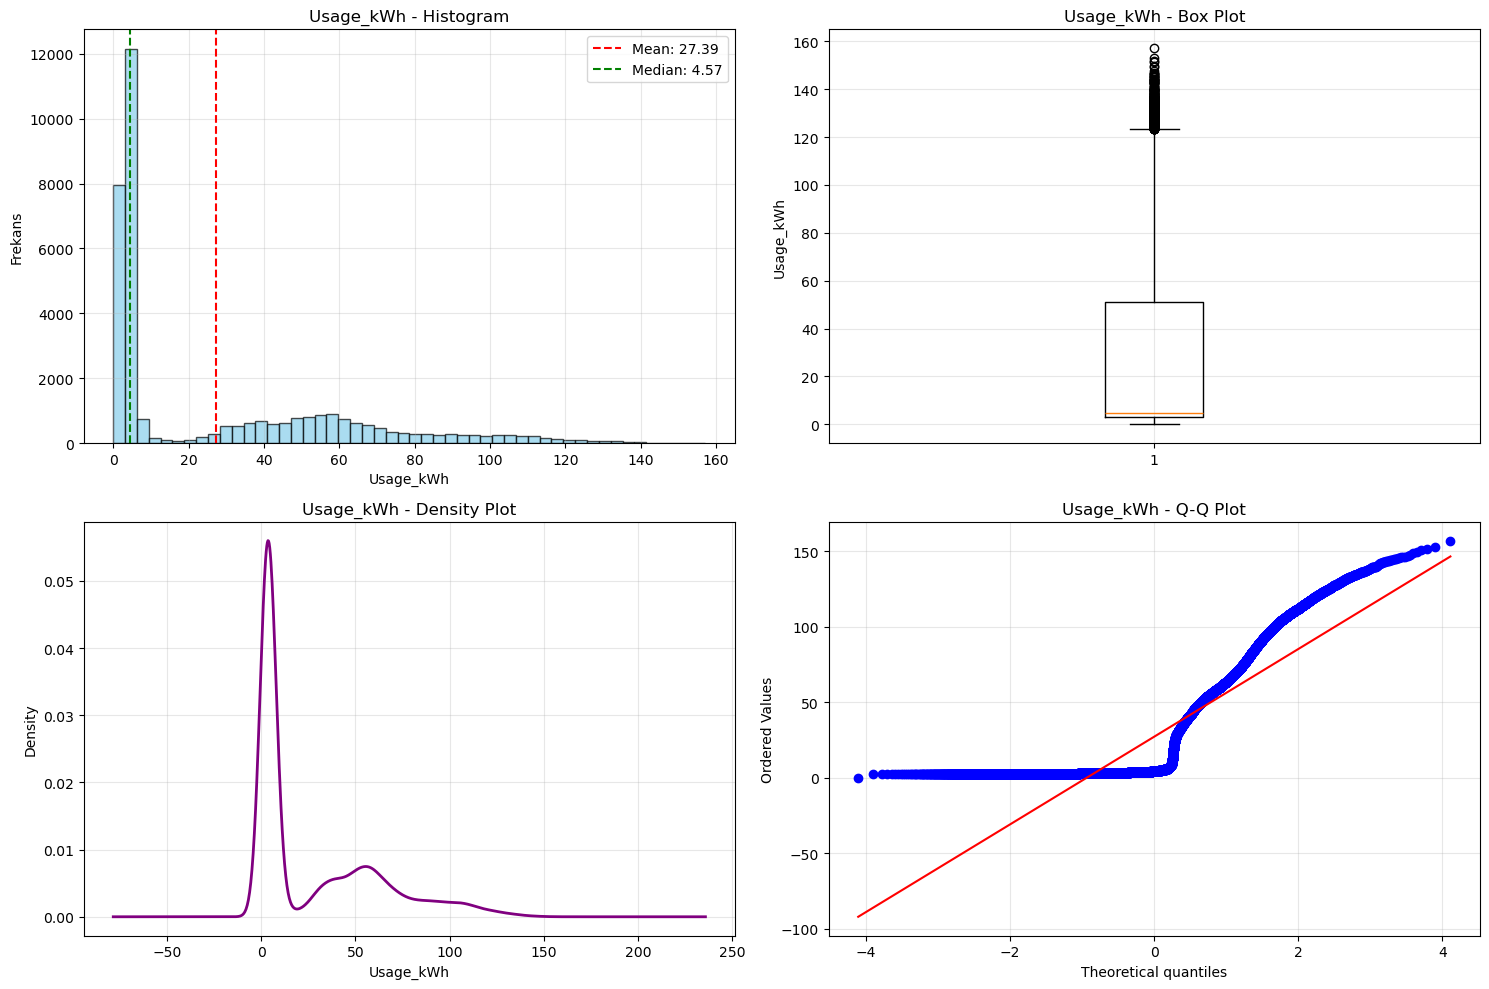

 KOLON ANALİZİ: Lagging_Current_Reactive.Power_kVarh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        96.91
Ortalama:        13.04
Medyan:          5.00
Std Sapma:       16.31
Varyans:         265.89
Skewness:        1.44
Kurtosis:        1.21

Yüzdelik Dilimler:
  25%:  2.30
  50%:  5.00
  75%:  22.64
  95%:  47.74
  99%:  62.90

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


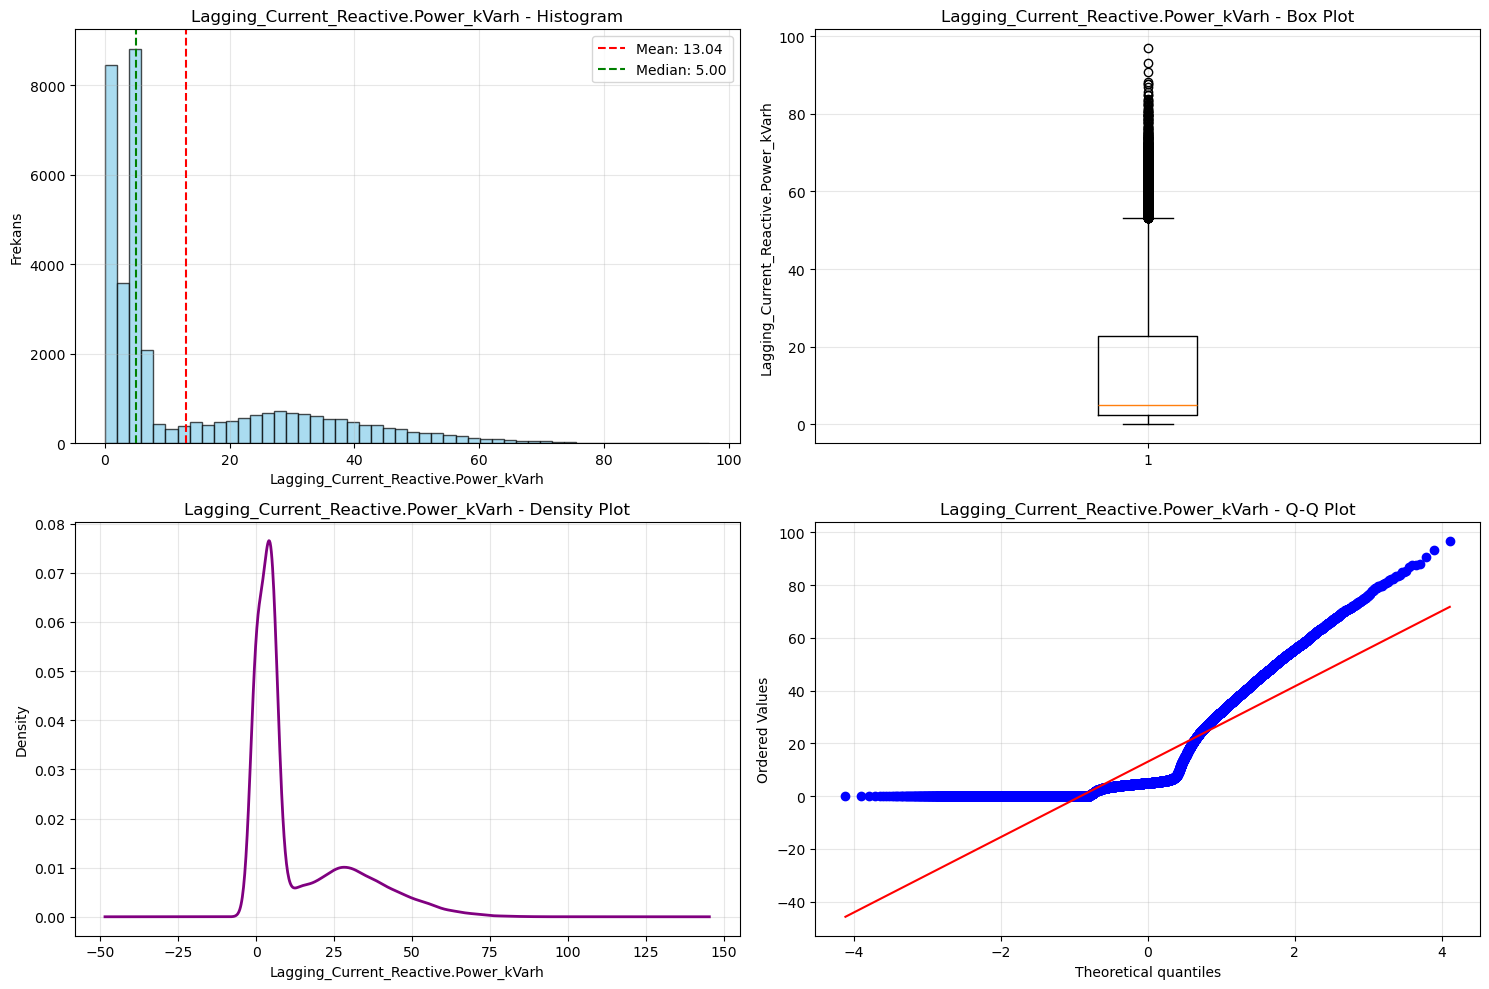

 KOLON ANALİZİ: Leading_Current_Reactive_Power_kVarh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        27.76
Ortalama:        3.87
Medyan:          0.00
Std Sapma:       7.42
Varyans:         55.12
Skewness:        1.73
Kurtosis:        1.58

Yüzdelik Dilimler:
  25%:  0.00
  50%:  0.00
  75%:  2.09
  95%:  21.28
  99%:  26.39

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


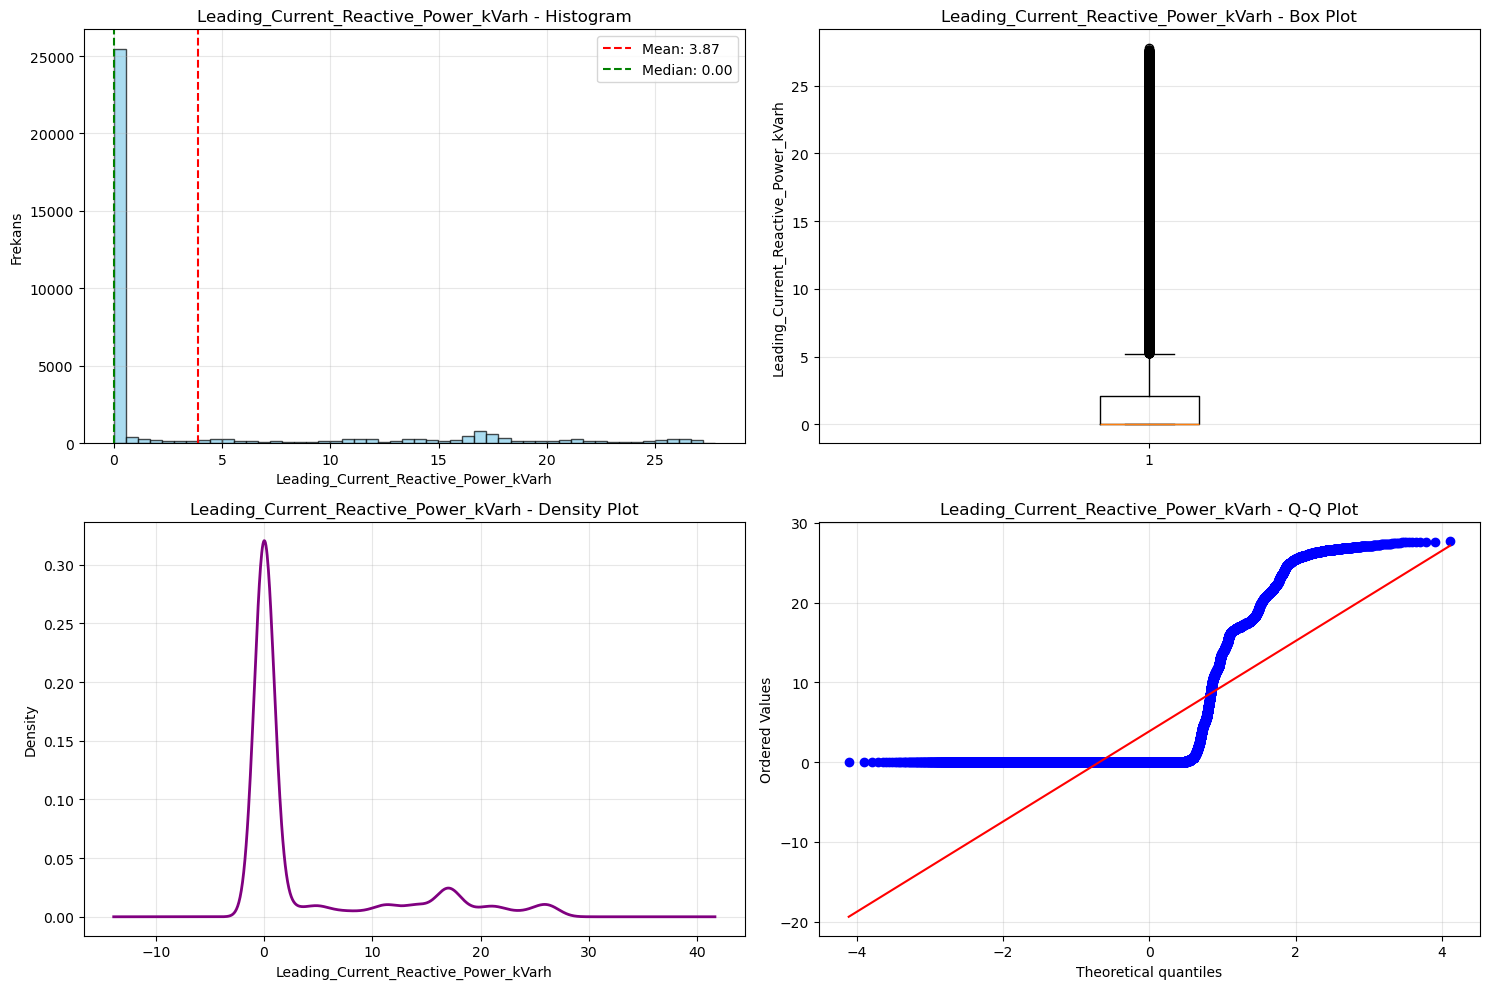

 KOLON ANALİZİ: CO2(tCO2)

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        0.07
Ortalama:        0.01
Medyan:          0.00
Std Sapma:       0.02
Varyans:         0.00
Skewness:        1.15
Kurtosis:        0.21

Yüzdelik Dilimler:
  25%:  0.00
  50%:  0.00
  75%:  0.02
  95%:  0.05
  99%:  0.06

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


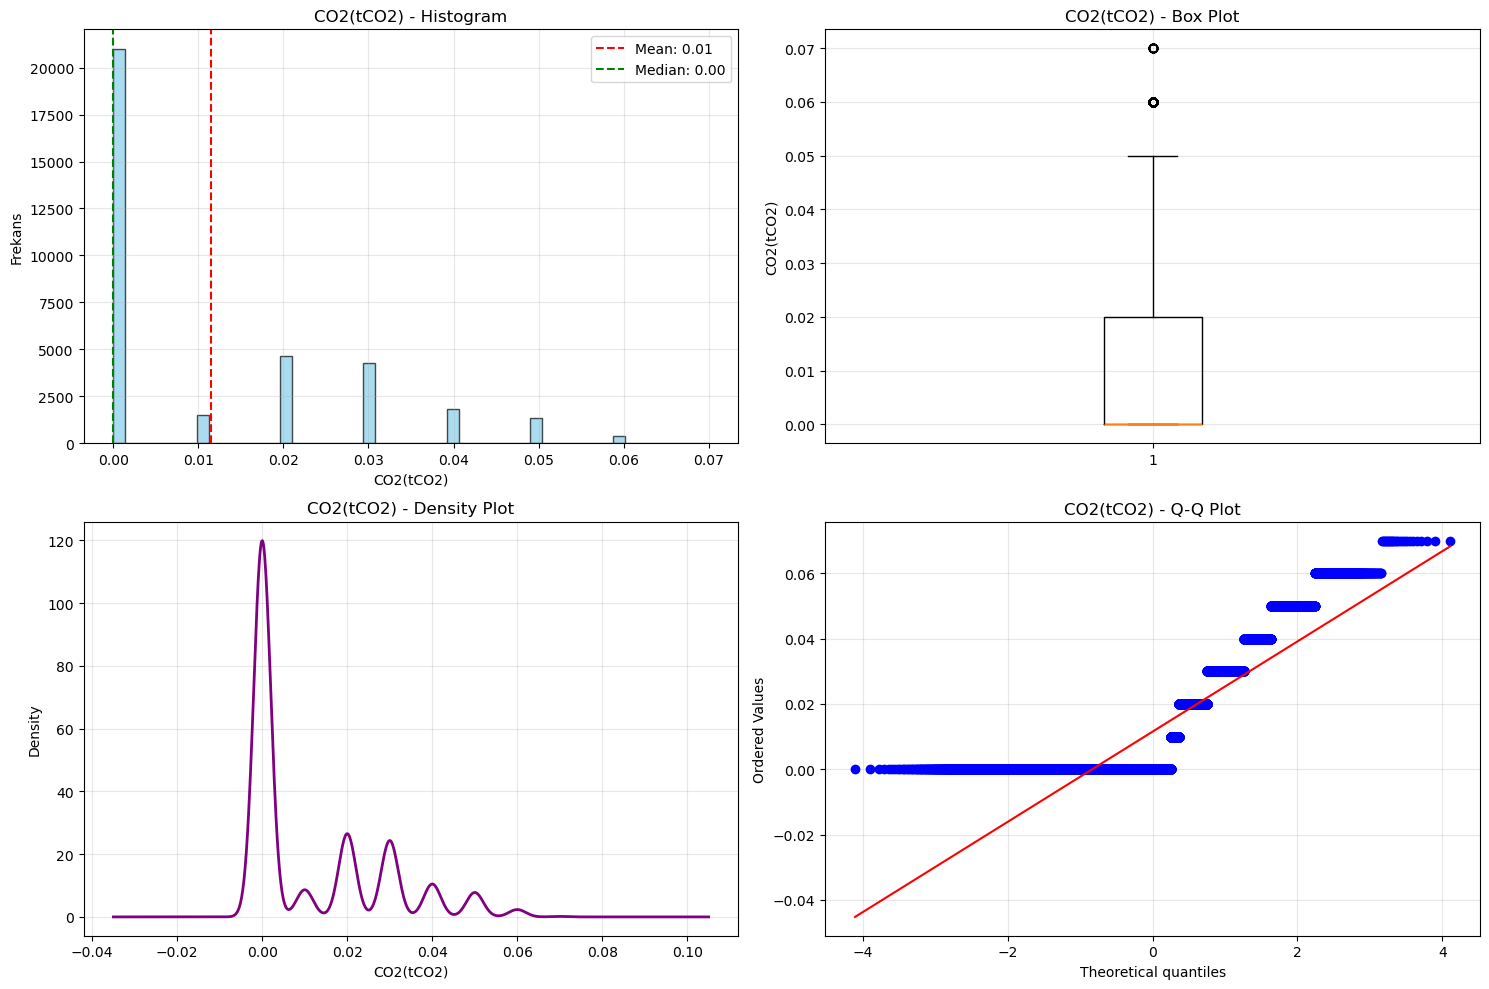

 KOLON ANALİZİ: Lagging_Current_Power_Factor

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        100.00
Ortalama:        80.58
Medyan:          87.96
Std Sapma:       18.92
Varyans:         358.02
Skewness:        -0.61
Kurtosis:        -1.10

Yüzdelik Dilimler:
  25%:  63.32
  50%:  87.96
  75%:  99.02
  95%:  100.00
  99%:  100.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


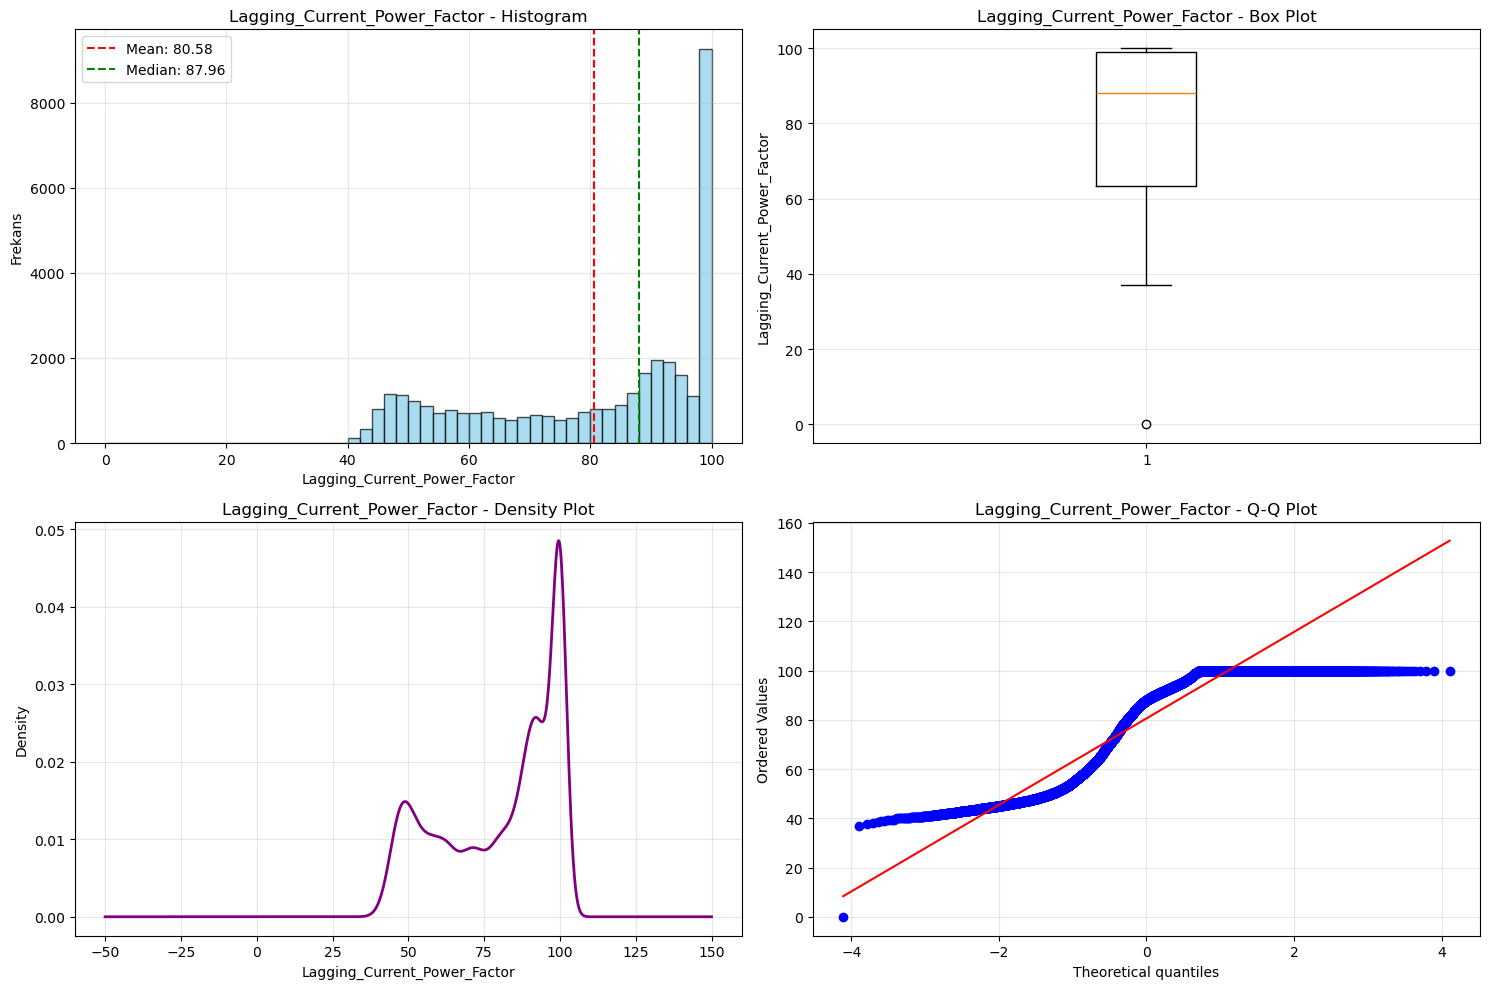

 KOLON ANALİZİ: Leading_Current_Power_Factor

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        100.00
Ortalama:        84.37
Medyan:          100.00
Std Sapma:       30.46
Varyans:         927.60
Skewness:        -1.51
Kurtosis:        0.38

Yüzdelik Dilimler:
  25%:  99.70
  50%:  100.00
  75%:  100.00
  95%:  100.00
  99%:  100.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


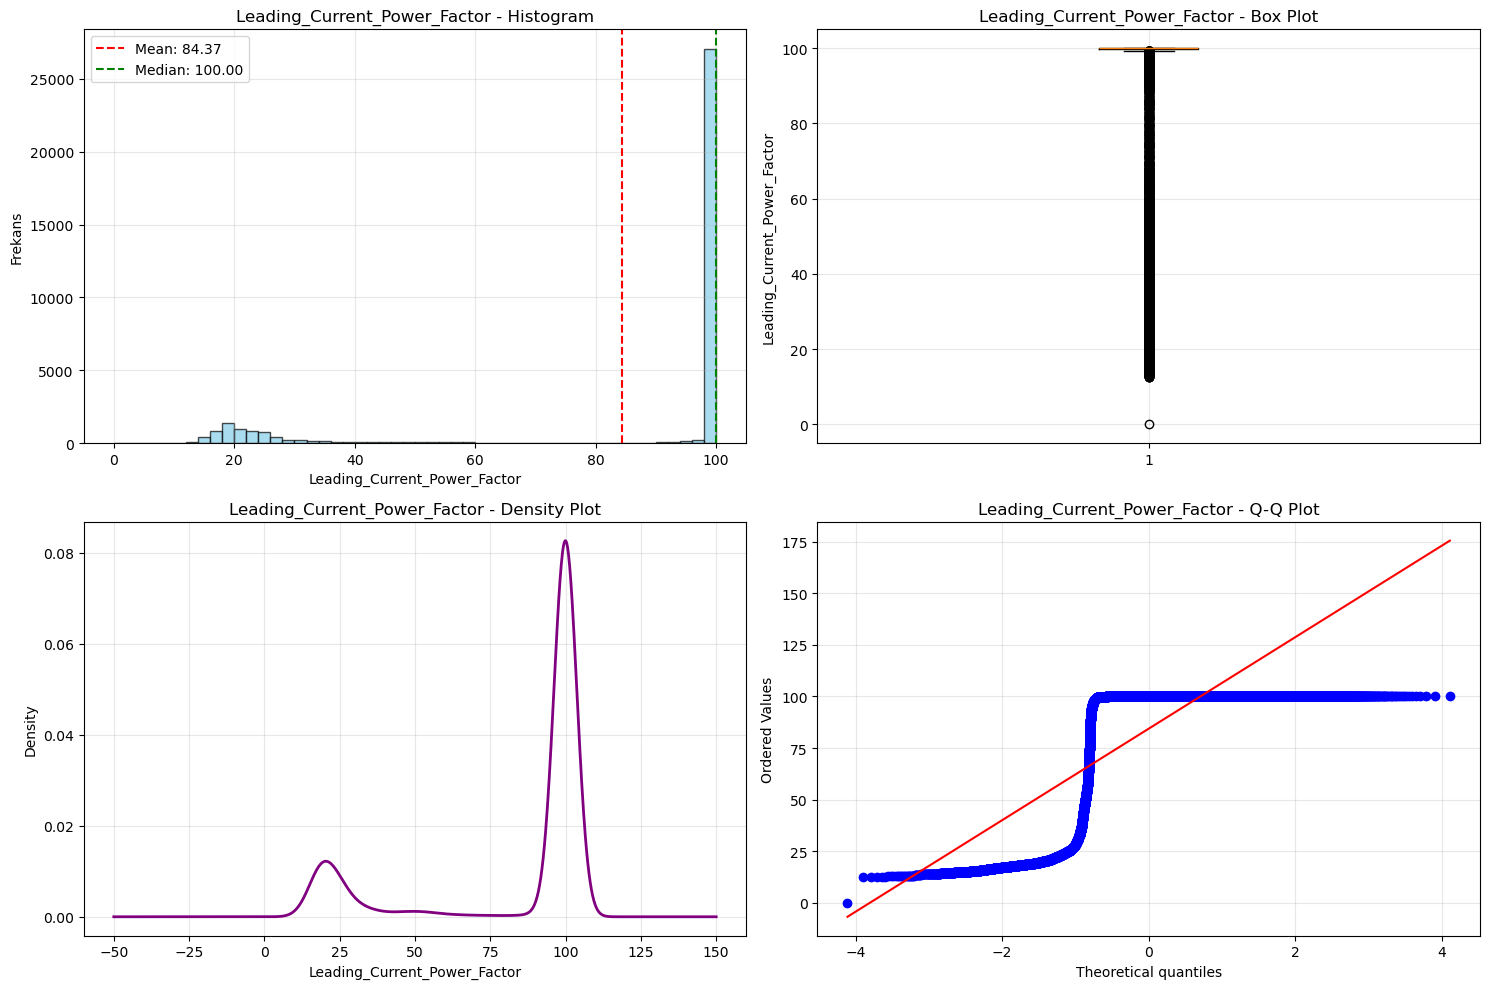

 KOLON ANALİZİ: NSM

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        85500.00
Ortalama:        42750.00
Medyan:          42750.00
Std Sapma:       24940.53
Varyans:         622030252.00
Skewness:        0.00
Kurtosis:        -1.20

Yüzdelik Dilimler:
  25%:  21375.00
  50%:  42750.00
  75%:  64125.00
  95%:  81900.00
  99%:  85500.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


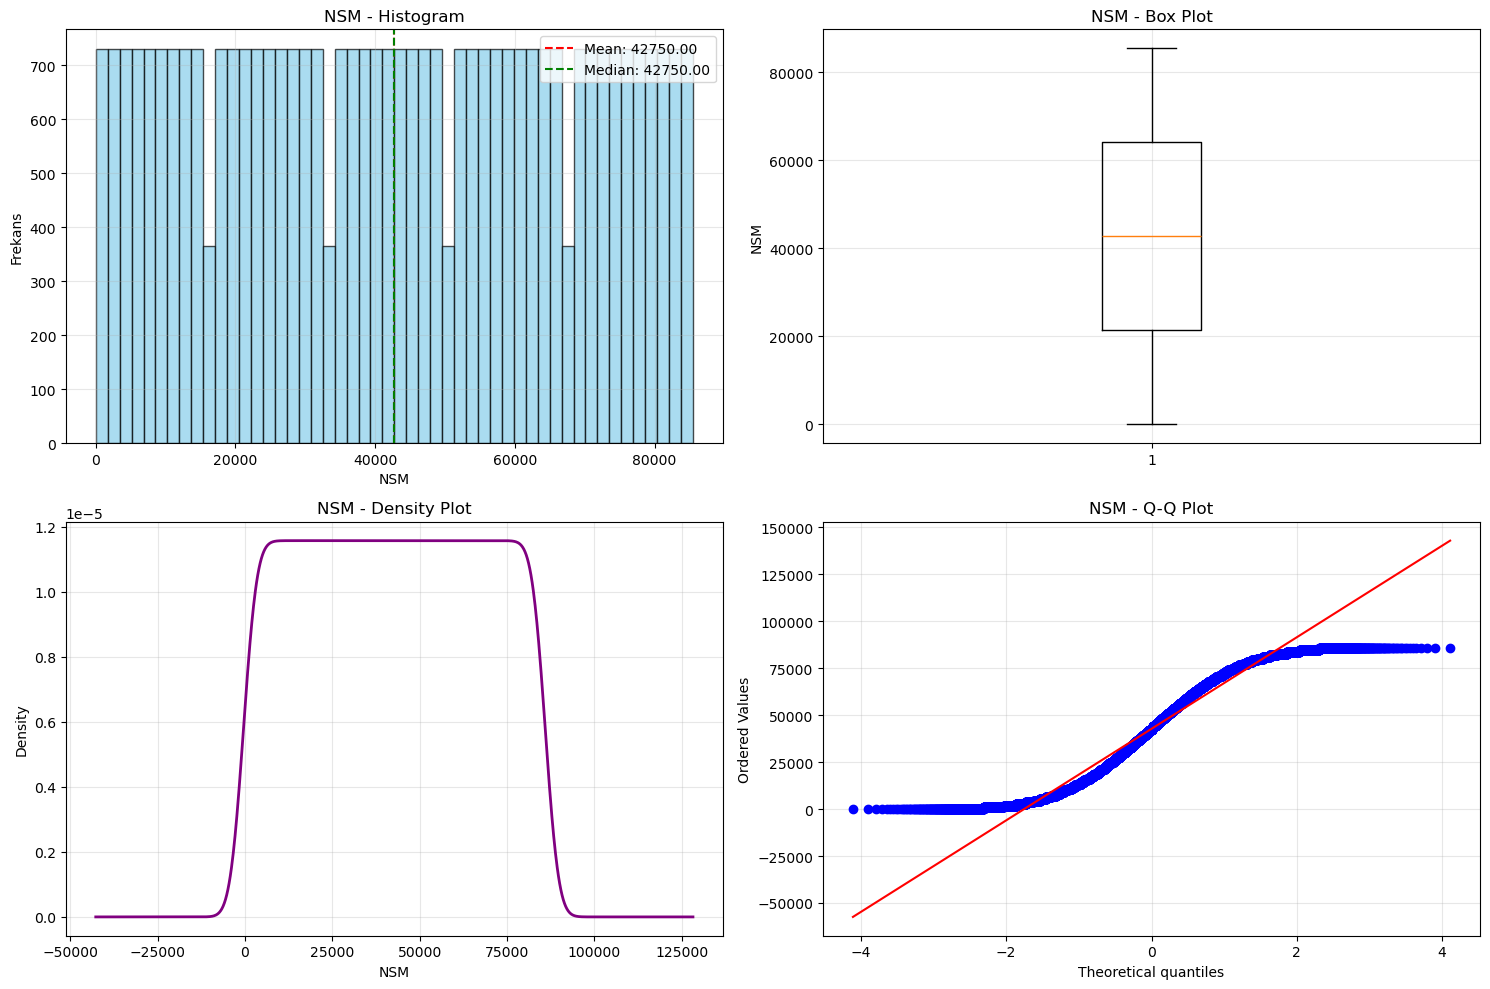

In [44]:
for col in numeric_cols:
    analyze_column(df,col,is_time_series=True)

### Usage_kWh
 Bimodal dağılım gösteriyor. Verilerin çoğu 0-10 kWh arasında, ikinci bir yoğunluk 20-60 kWh civarında. Muhtemelen farklı çalışma modları var - düşük tüketim bekleme/duruş, yüksek tüketim aktif üretim. Ortalama (27.39) ile medyan (4.57) arasındaki fark sağa çarpıklığı gösteriyor. Box plot'ta çok sayıda outlier var.
### Lagging_Current_Reactive_Power_kVarh
Usage_kWh'a benzer bimodal yapı. Reaktif güç enerji tüketimiyle paralel artıyor. Medyan (5.00) ortalamanın (13.04) altında. Üst kısımda yoğun outlier'lar var.
### Leading_Current_Reactive_Power_kVarh
Medyan 0, verilerin çoğu sıfıra yakın. Histogram'da keskin tepe, sonra uzun kuyruk. Endüstriyel yüklerde beklenen bir durum - genelde lagging karakterli motorlar/transformatörler olduğu için leading reactive power düşük.
### CO2(tCO2)
Discrete değerler alıyor. Çoğu veri 0'da, sonra belirli seviyelerde (0.02, 0.03, 0.04) tepe noktaları. Muhtemelen farklı modlar için sabit katsayılarla hesaplanmış.
### Lagging_Current_Power_Factor
Bimodal dağılım: bir grup 100 civarında (verimli), diğer grup 40-80 arasında geniş dağılım. Yüksek değerler verimli çalışmayı, düşük değerler reaktif gücün yüksek olduğu verimsiz dönemleri gösteriyor.
### Leading_Current_Power_Factor
Verilerin neredeyse tamamı 100 değerinde. Leading power factor çoğunlukla kullanılmıyor/inaktif. Endüstriyel tesislerde kapasitif yükler nadir olduğu için normal.
### NSM
Mükemmel uniform dağılım. Değer aralığı 0-86400 (bir günün saniye sayısı). Veri toplama günün her saatine eşit dağılmış. Bu dataset zaman serisi özellikleri taşıyor.

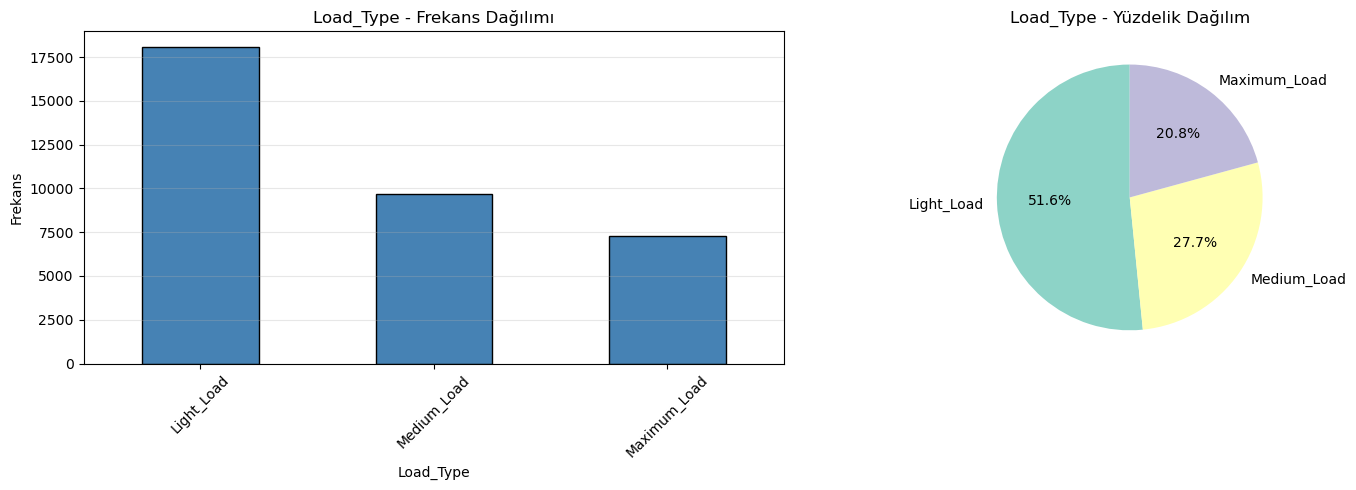

In [49]:
# Numeric kolon analizimiz bitti kategorik kolonlarda analiz edilmesi gereken tek kolon load type o yüzden fonksiyon yazmıyoruz.

value_counts = df['Load_Type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

value_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Load_Type - Frekans Dağılımı')
axes[0].set_xlabel('Load_Type')
axes[0].set_ylabel('Frekans')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

colors = plt.cm.Set3(range(len(value_counts)))
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Load_Type - Yüzdelik Dağılım')

plt.tight_layout()
plt.show()


 KOLONLAR ARASI İLİŞKİ ANALİZİ

Korelasyon Matrisi:
                                      Usage_kWh  \
Usage_kWh                                  1.00   
Lagging_Current_Reactive.Power_kVarh       0.90   
Leading_Current_Reactive_Power_kVarh      -0.32   
CO2(tCO2)                                  0.99   
Lagging_Current_Power_Factor               0.39   
Leading_Current_Power_Factor               0.35   
NSM                                        0.23   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                             0.90   
Lagging_Current_Reactive.Power_kVarh                                  1.00   
Leading_Current_Reactive_Power_kVarh                                 -0.41   
CO2(tCO2)                                                             0.89   
Lagging_Current_Power_Factor                                          0.14   
Leading_Current_Power_Factor                                          0

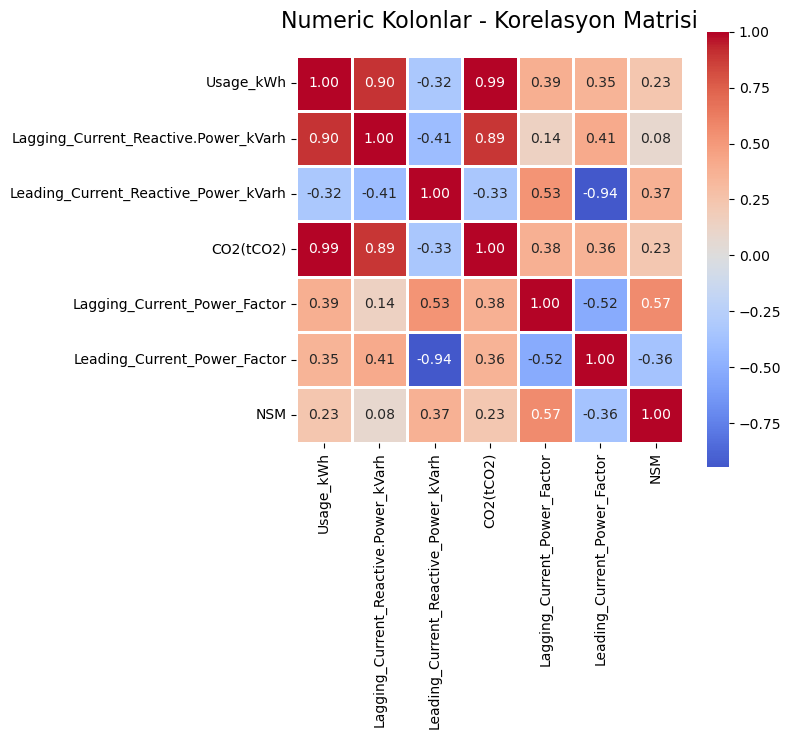


 Usage_kWh İLE DİĞER KOLONLAR ARASINDAKİ İLİŞKİLER

Usage_kWh ile Korelasyonlar (Sıralı):
  CO2(tCO2)                                         :   0.988
  Lagging_Current_Reactive.Power_kVarh              :   0.896
  Lagging_Current_Power_Factor                      :   0.386
  Leading_Current_Power_Factor                      :   0.354
  NSM                                               :   0.235
  Leading_Current_Reactive_Power_kVarh              :  -0.325


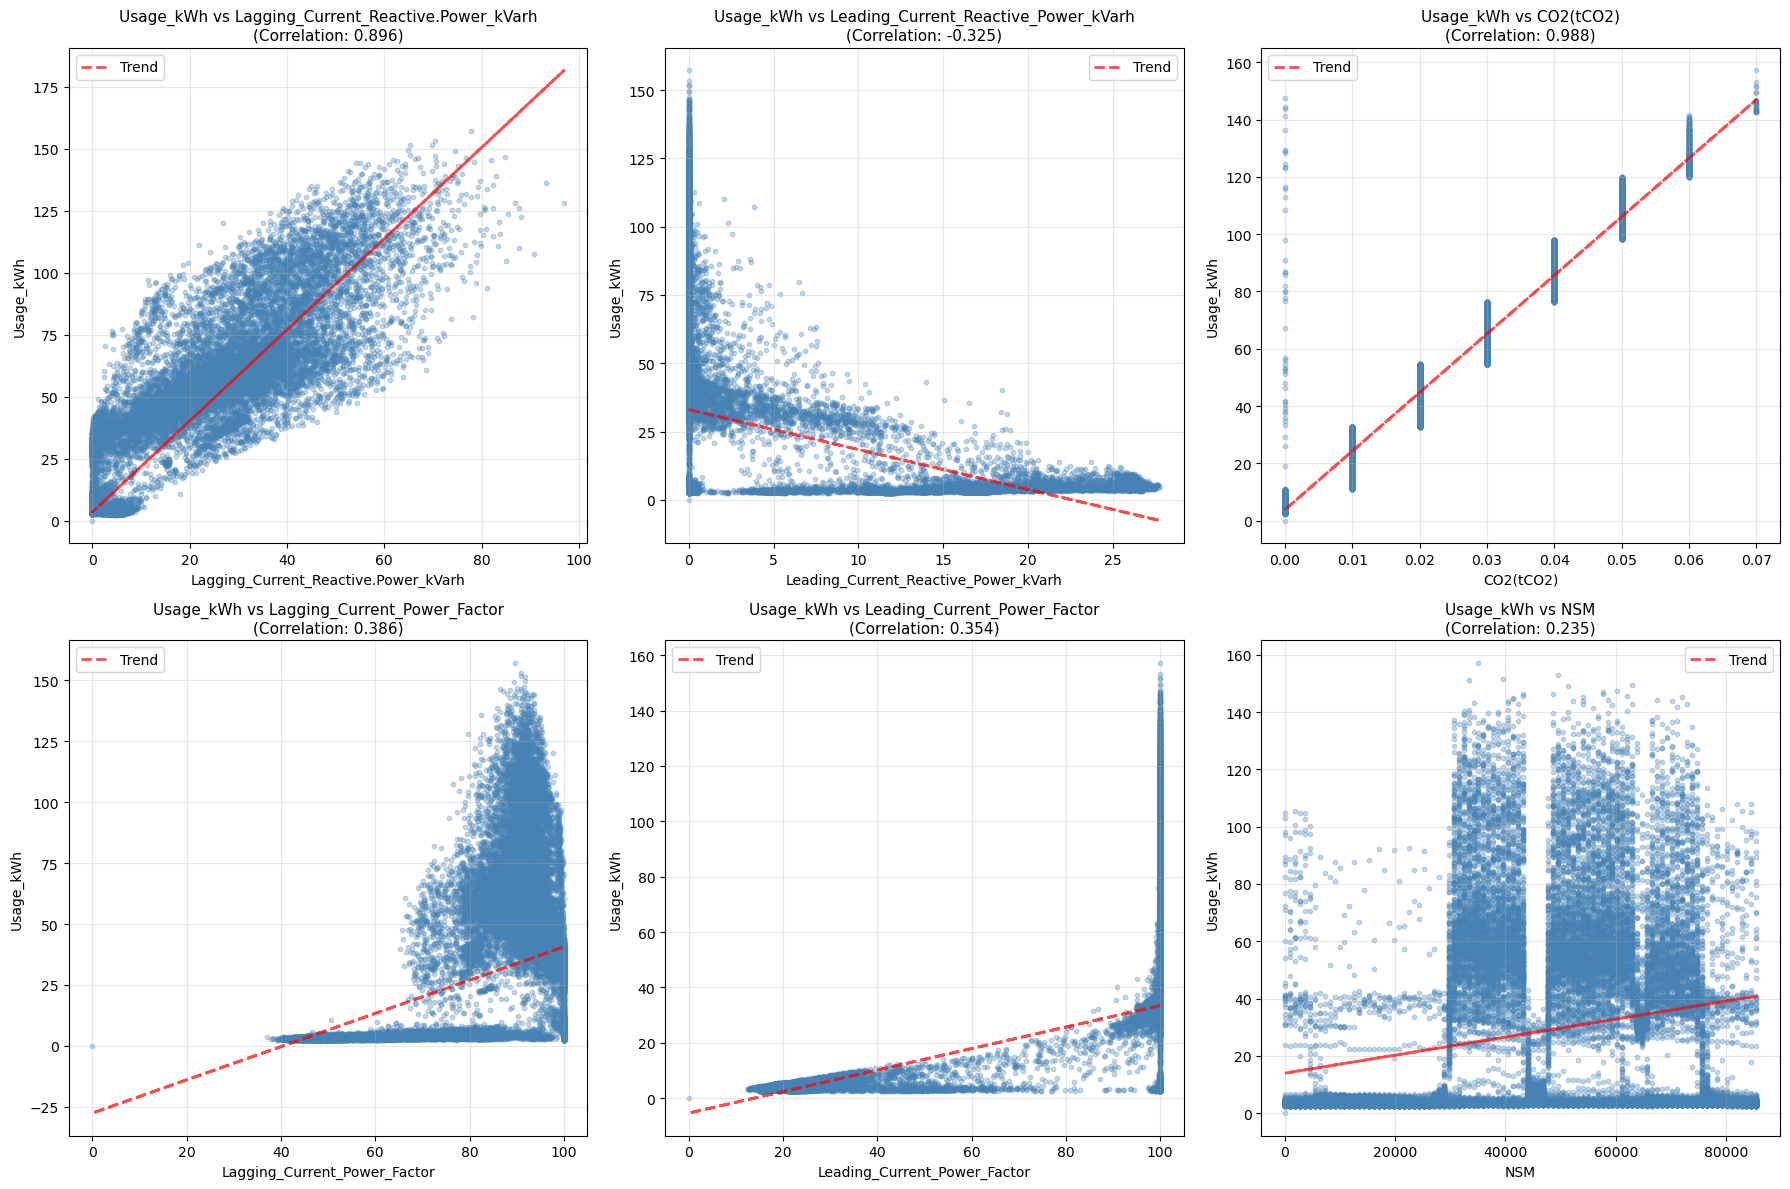


 REACTIVE POWER BALANCE ANALİZİ

Reactive Power Difference İstatistikleri:
  Ortalama: 9.16 kVarh
  Medyan:   4.97 kVarh
  Std Dev:  20.47 kVarh

Reactive Power Ratio İstatistikleri:
  Ortalama: 3482.368
  Medyan:   0.000


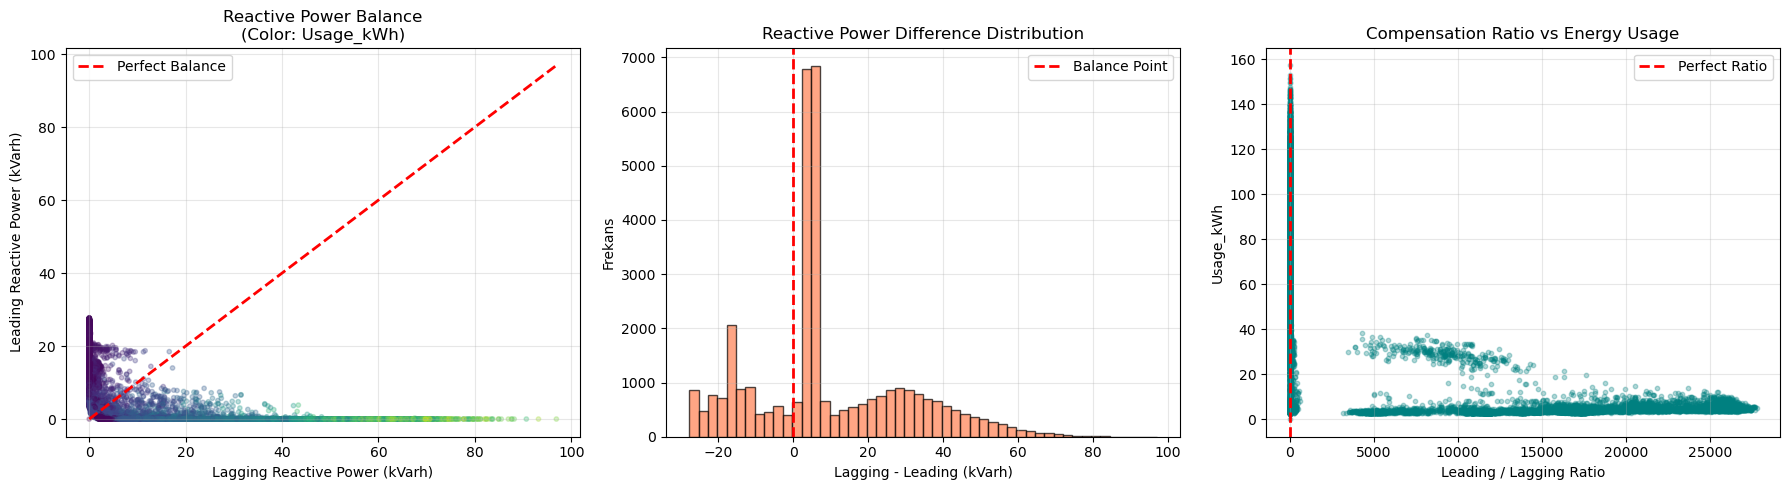


 POWER FACTOR VERİMLİLİK ANALİZİ

Power Factor Kategorilerine Göre Usage_kWh İstatistikleri:
                 count       mean  median        std
PF_Category                                         
İyi (85-94)       8062  69.731867   63.50  28.452405
Orta (70-84)      5183  26.571534    5.83  28.576190
Mükemmel (>=95)  11067  19.973216    4.90  25.409517
Düşük (<70)      10728   3.606875    3.10   3.811255


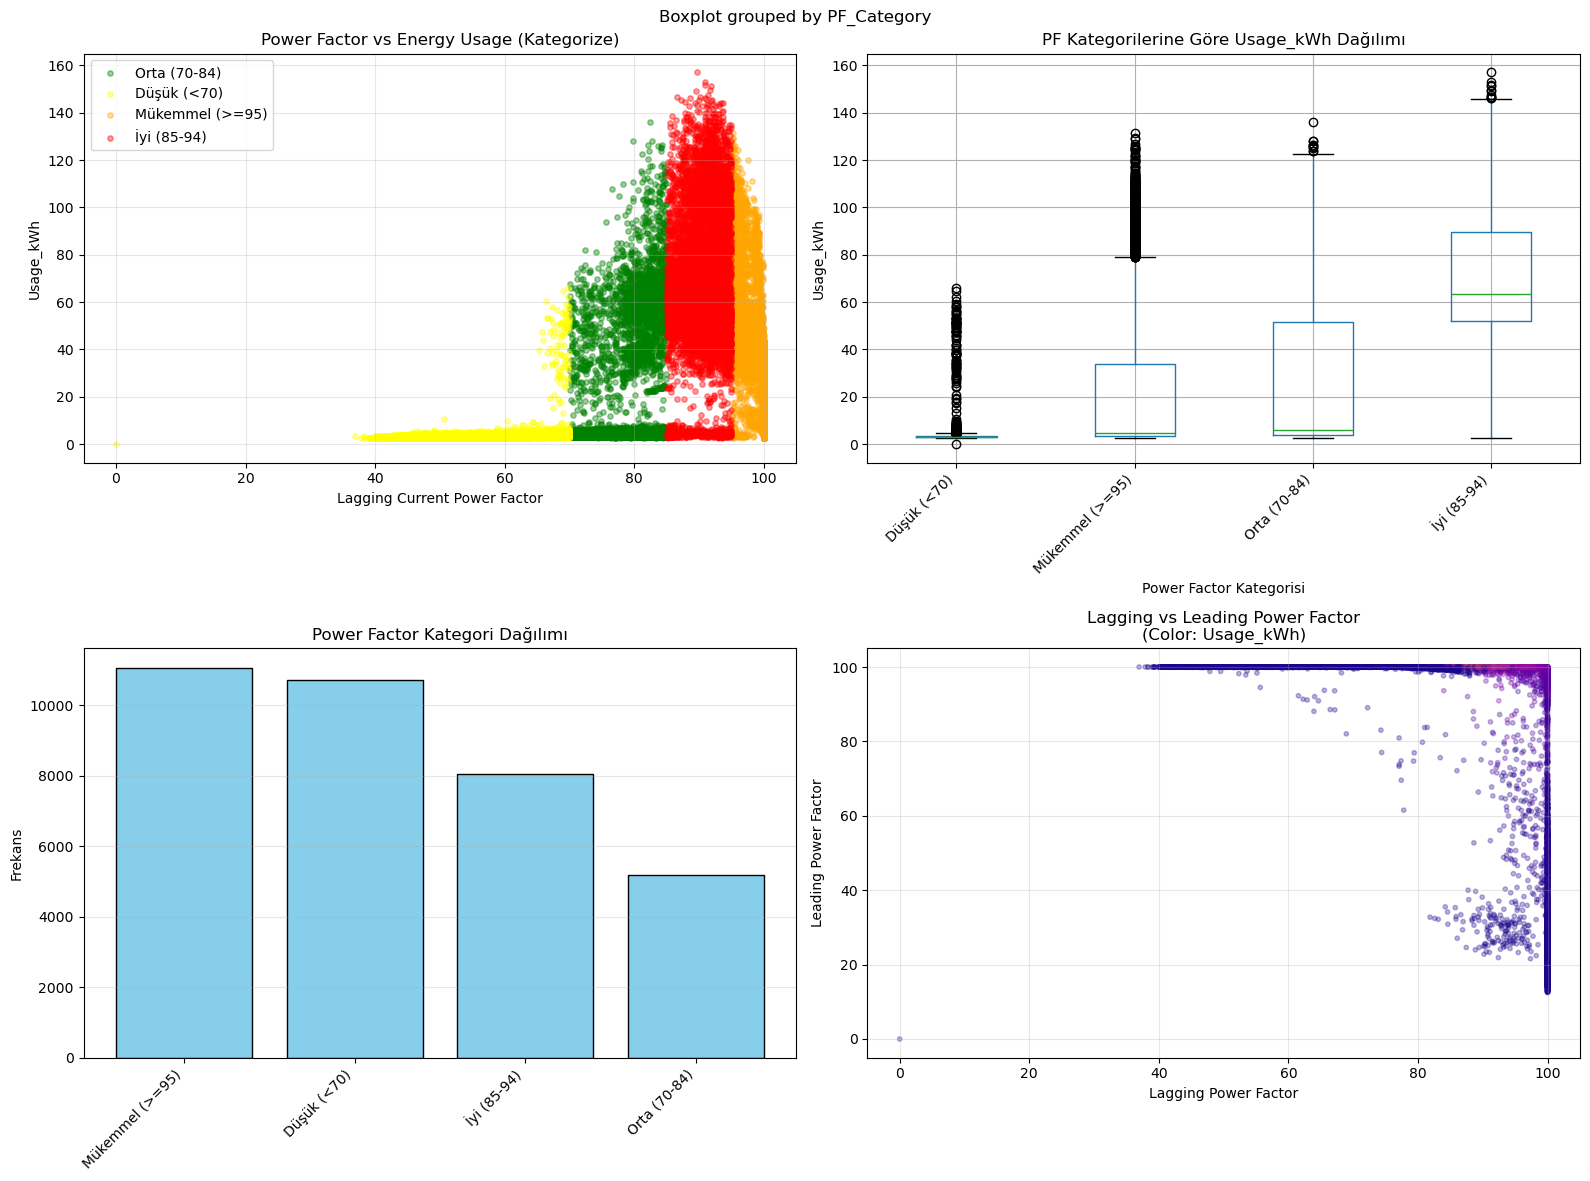


 LOAD TYPE BAZINDA KARŞILAŞTIRMALI ANALİZ

Load Type Bazında İstatistikler:
             Usage_kWh               Lagging_Current_Reactive.Power_kVarh  \
                  mean median    std                                 mean   
Load_Type                                                                   
Light_Load        8.63   3.31  17.91                                 7.00   
Maximum_Load     59.27  56.63  29.75                                26.19   
Medium_Load      38.45  34.44  35.22                                14.41   

                           Leading_Current_Reactive_Power_kVarh               \
             median    std                                 mean median   std   
Load_Type                                                                      
Light_Load     4.46  11.68                                 2.94   0.00  6.40   
Maximum_Load  26.46  17.28                                 1.62   0.00  4.75   
Medium_Load    5.65  16.82                                 7

C:\Users\bugra\AppData\Local\Temp\ipykernel_4936\3365829578.py:214: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_4936\3365829578.py:214: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_4936\3365829578.py:214: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_4936\336582957

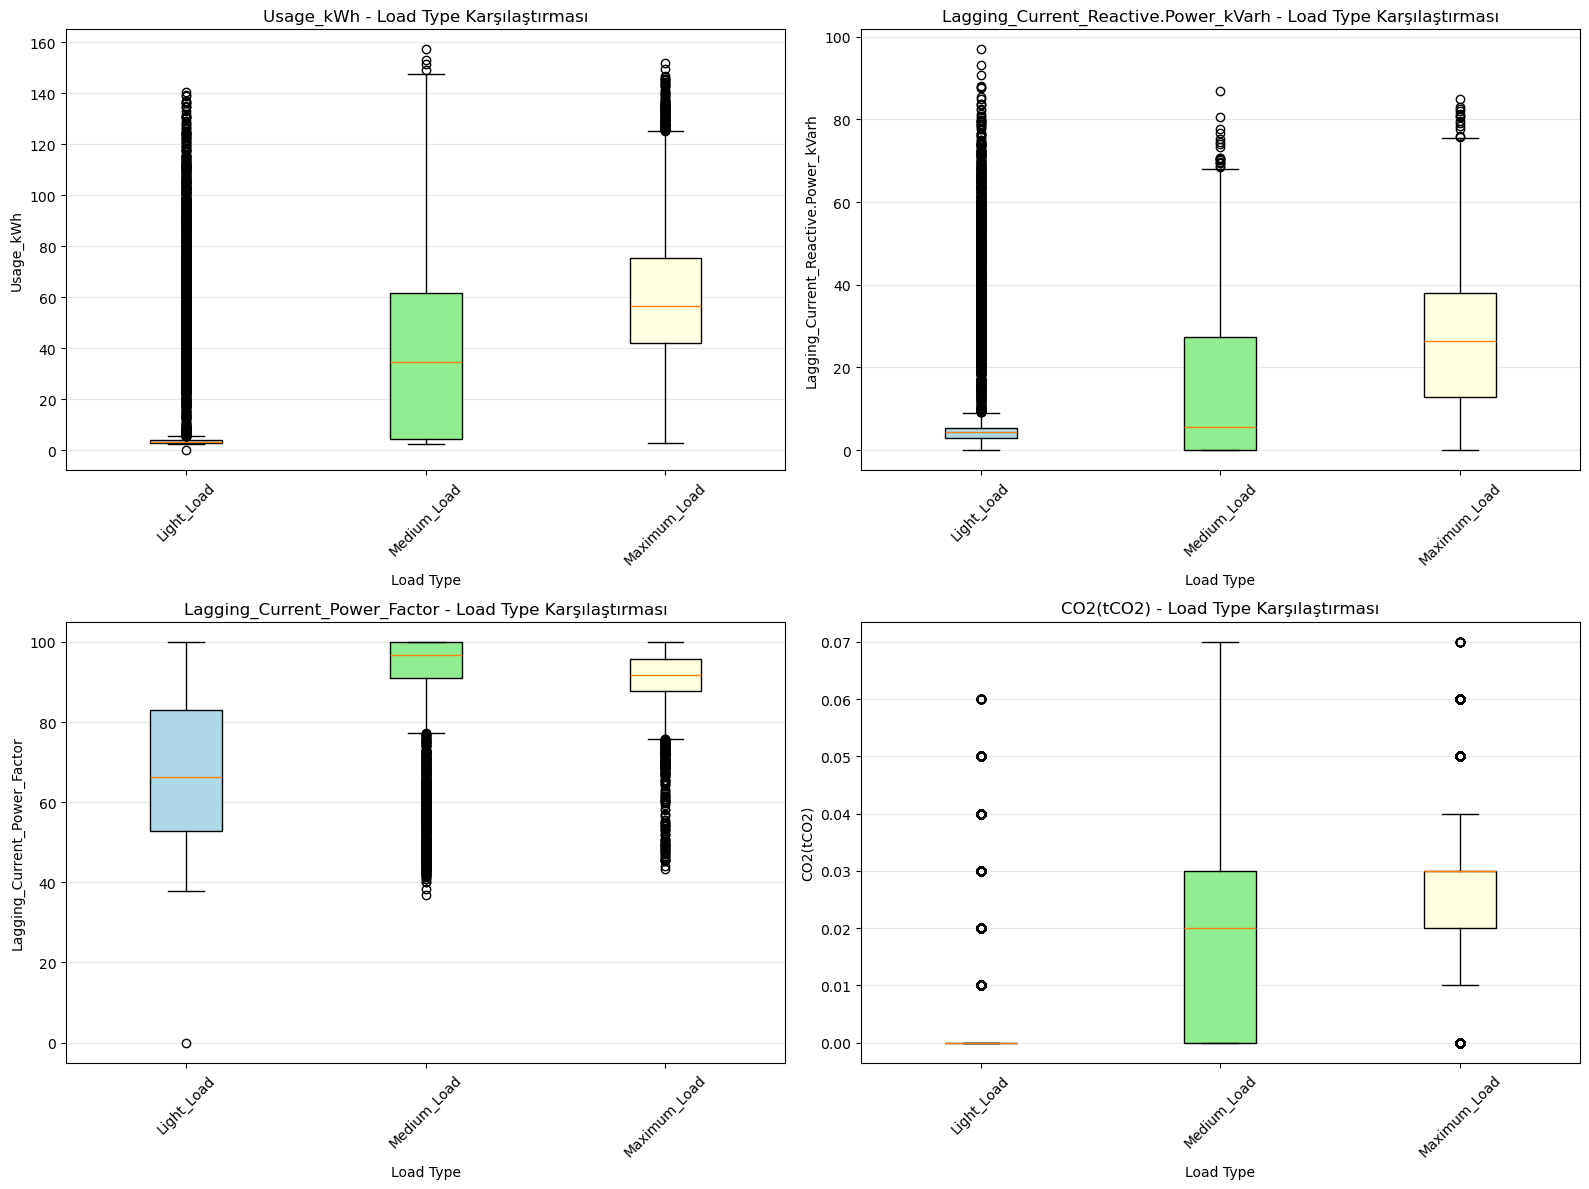

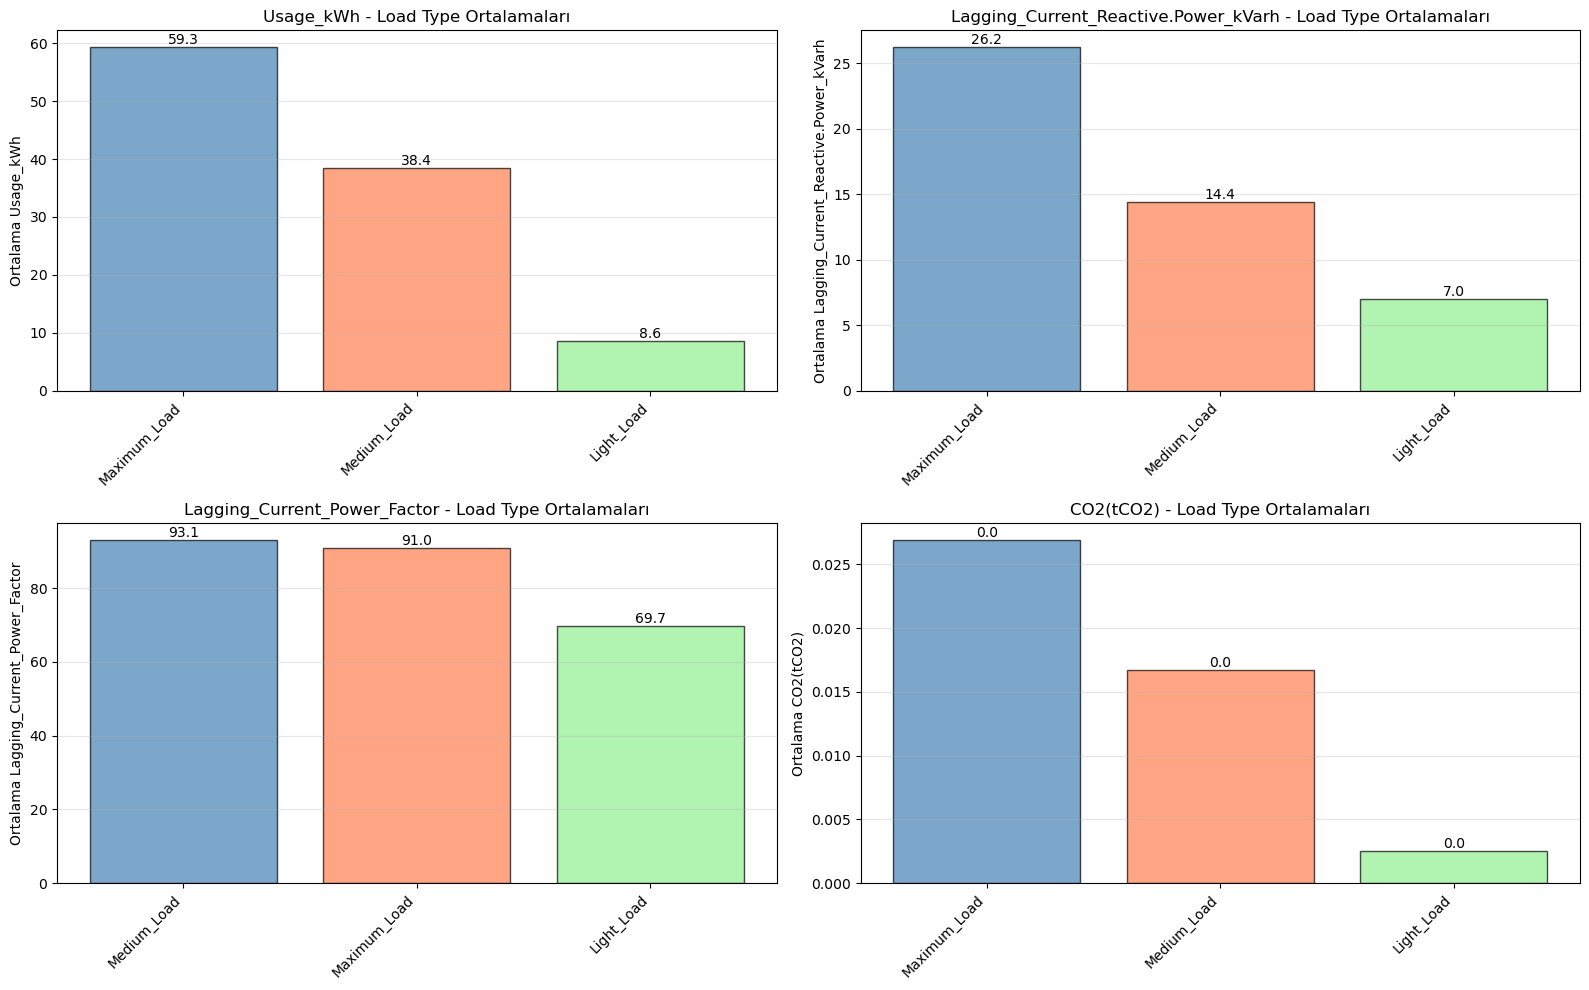


 ZAMAN BAZLI PATTERN ANALİZİ (NSM)

Saatlik Usage_kWh İstatistikleri:
       mean  median    std  count
Hour                             
0      7.87    3.48  16.06   1460
1      6.07    3.35  12.01   1460
2      4.43    3.20   6.58   1460
3      4.36    3.13   6.38   1460
4      4.31    3.13   6.43   1460
5      4.25    3.13   6.49   1460
6      4.22    3.10   6.76   1460
7      4.50    3.31   6.49   1460
8     37.70   34.70  33.31   1460
9     58.55   59.44  34.89   1460
10    55.87   55.73  33.59   1460
11    57.10   58.10  34.22   1460
12    18.46    6.19  26.43   1460
13    39.02   37.22  34.00   1460
14    56.16   56.52  33.79   1460
15    55.64   55.58  33.79   1460
16    55.80   56.63  34.34   1460
17    43.83   42.86  34.33   1460
18    33.02   31.25  29.36   1460
19    38.21   39.62  34.47   1460
20    37.48   37.33  34.49   1460
21    13.78    4.36  20.79   1460
22     8.66    3.74  16.50   1460
23     8.00    3.56  16.08   1460


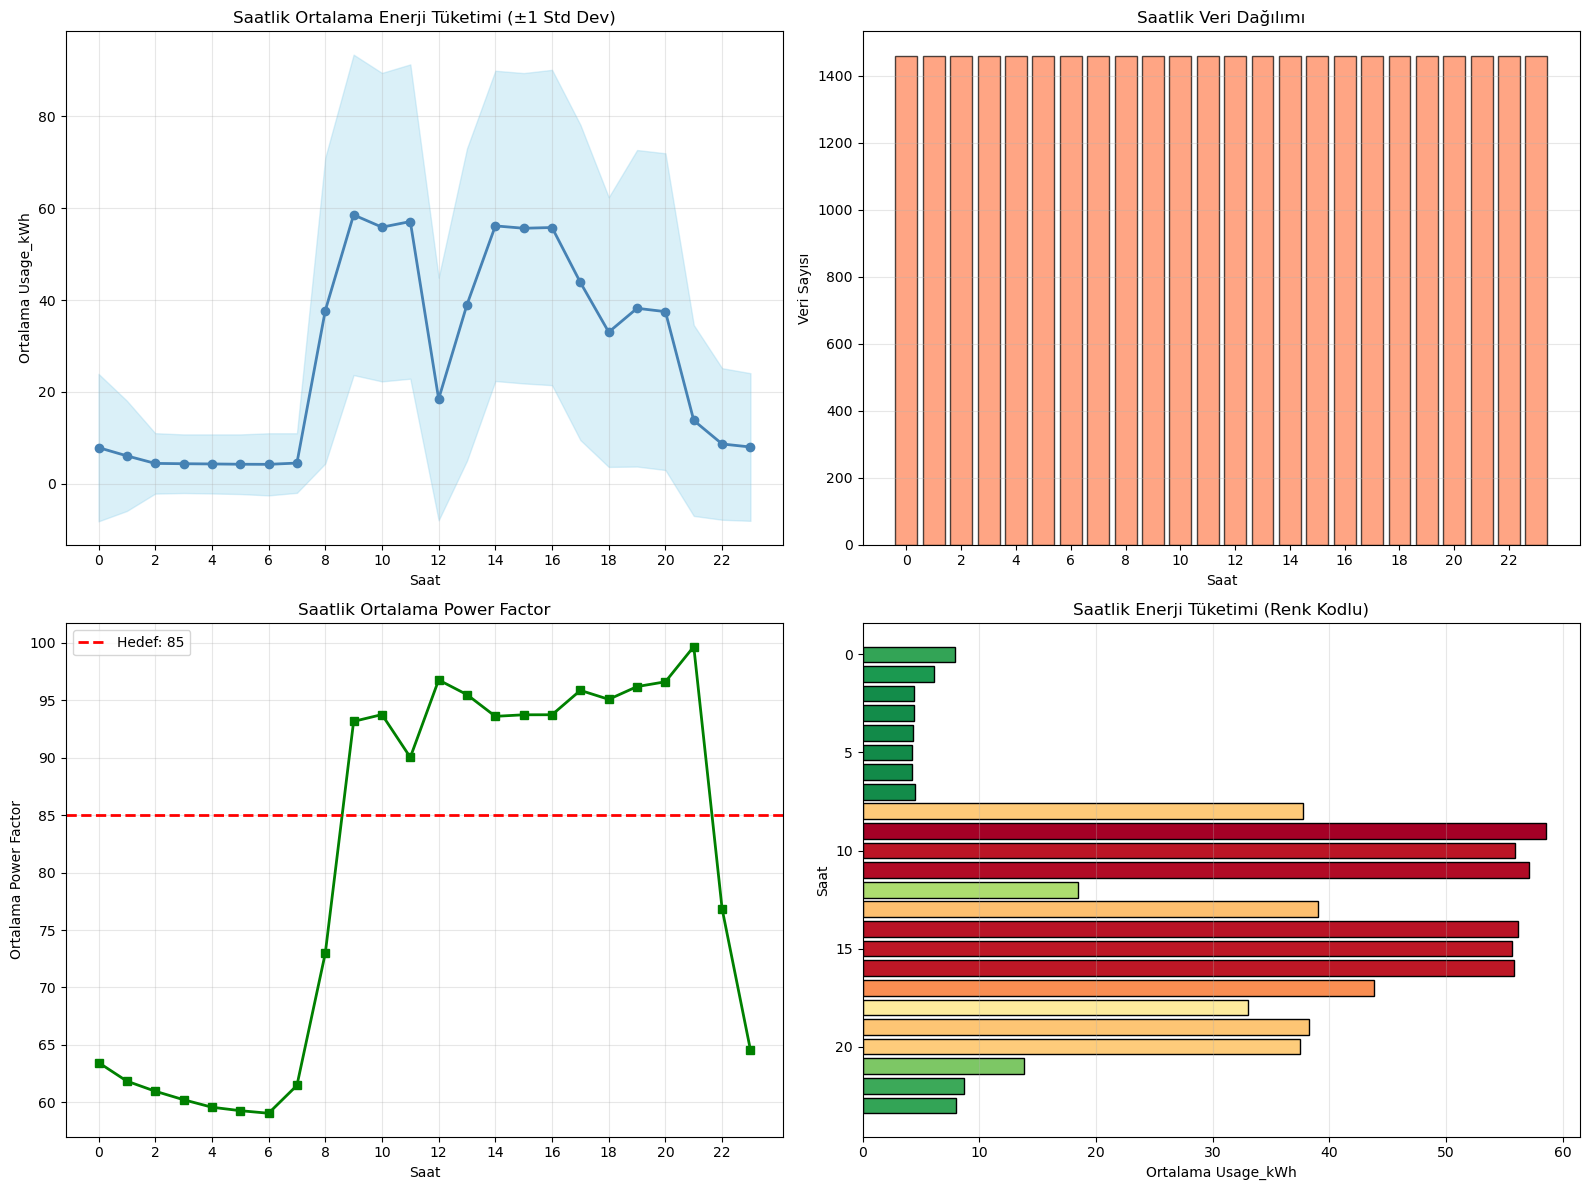


En Yüksek Tüketim Saatleri:
           mean  median
Hour                   
9     58.551733   59.44
11    57.097459   58.10
14    56.155260   56.52
10    55.874733   55.73
16    55.799582   56.63

En Düşük Tüketim Saatleri:
          mean  median
Hour                  
6     4.223705    3.10
5     4.245548    3.13
4     4.309438    3.13
3     4.358041    3.13
2     4.428390    3.20

 CO2 EMİSYONU ANALİZİ

CO2 Emission Factor İstatistikleri:
  Ortalama: 0.000185 tCO2/kWh
  Medyan:   0.000000 tCO2/kWh
  Min:      0.000000 tCO2/kWh
  Max:      0.000917 tCO2/kWh


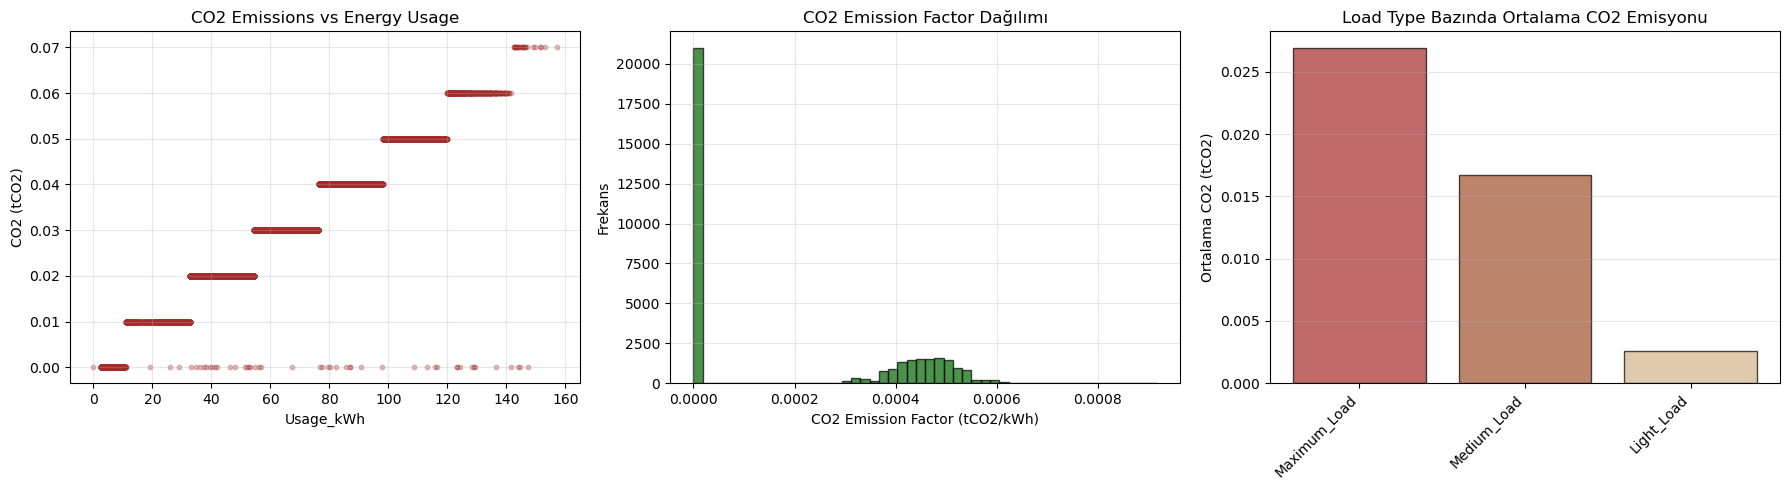


 KOLON İLİŞKİ ANALİZİ TAMAMLANDI


In [53]:
# Kolonlar arası ilişkileri incelemek için correlation matrix ve scatter plotlar oluşturacağız.
# Öncelikle tüm numeric kolonlar arası korelasyonu inceleyelim.

print("="*80)
print(" KOLONLAR ARASI İLİŞKİ ANALİZİ")
print("="*80)

# Korelasyon matrisini hesapla
correlation_matrix = df[numeric_cols].corr()

print("\nKorelasyon Matrisi:")
print(correlation_matrix.round(2))

# Yüksek korelasyonlu değişken çiftlerini bul
print("\nYüksek Korelasyonlu Değişken Çiftleri (|r| > 0.7):")
print("-"*50)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_value:.3f}")

# Korelasyon heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Numeric Kolonlar - Korelasyon Matrisi", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Usage_kWh ile diğer kolonlar arasındaki ilişkileri detaylı incele
print("\n" + "="*80)
print(" Usage_kWh İLE DİĞER KOLONLAR ARASINDAKİ İLİŞKİLER")
print("="*80)

target_correlations = correlation_matrix["Usage_kWh"].drop("Usage_kWh").sort_values(ascending=False)
print("\nUsage_kWh ile Korelasyonlar (Sıralı):")
for col, corr in target_correlations.items():
    print(f"  {col:50s}: {corr:7.3f}")

# Usage_kWh vs diğer önemli değişkenler - Scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

scatter_cols = ["Lagging_Current_Reactive.Power_kVarh", 
                "Leading_Current_Reactive_Power_kVarh",
                "CO2(tCO2)",
                "Lagging_Current_Power_Factor",
                "Leading_Current_Power_Factor",
                "NSM"]

for idx, col in enumerate(scatter_cols):
    axes[idx].scatter(df[col], df["Usage_kWh"], alpha=0.3, s=10, color="steelblue")
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel("Usage_kWh", fontsize=10)
    axes[idx].set_title(f"Usage_kWh vs {col}\n(Correlation: {correlation_matrix.loc['Usage_kWh', col]:.3f})", 
                       fontsize=11)
    axes[idx].grid(True, alpha=0.3)
    
    # Trend line ekle
    z = np.polyfit(df[col], df["Usage_kWh"], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", linewidth=2, alpha=0.7, label="Trend")
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Reactive Power dengesi analizi - Lagging vs Leading
print("\n" + "="*80)
print(" REACTIVE POWER BALANCE ANALİZİ")
print("="*80)

df["Reactive_Power_Difference"] = df["Lagging_Current_Reactive.Power_kVarh"] - df["Leading_Current_Reactive_Power_kVarh"]
df["Reactive_Power_Ratio"] = df["Leading_Current_Reactive_Power_kVarh"] / (df["Lagging_Current_Reactive.Power_kVarh"] + 0.001)

print("\nReactive Power Difference İstatistikleri:")
print(f"  Ortalama: {df['Reactive_Power_Difference'].mean():.2f} kVarh")
print(f"  Medyan:   {df['Reactive_Power_Difference'].median():.2f} kVarh")
print(f"  Std Dev:  {df['Reactive_Power_Difference'].std():.2f} kVarh")

print("\nReactive Power Ratio İstatistikleri:")
print(f"  Ortalama: {df['Reactive_Power_Ratio'].mean():.3f}")
print(f"  Medyan:   {df['Reactive_Power_Ratio'].median():.3f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Lagging vs Leading scatter
axes[0].scatter(df["Lagging_Current_Reactive.Power_kVarh"], 
               df["Leading_Current_Reactive_Power_kVarh"], 
               alpha=0.3, s=10, c=df["Usage_kWh"], cmap="viridis")
axes[0].plot([0, df["Lagging_Current_Reactive.Power_kVarh"].max()], 
            [0, df["Lagging_Current_Reactive.Power_kVarh"].max()], 
            'r--', linewidth=2, label="Perfect Balance")
axes[0].set_xlabel("Lagging Reactive Power (kVarh)")
axes[0].set_ylabel("Leading Reactive Power (kVarh)")
axes[0].set_title("Reactive Power Balance\n(Color: Usage_kWh)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Reactive Power Difference distribution
axes[1].hist(df["Reactive_Power_Difference"], bins=50, color="coral", 
            edgecolor="black", alpha=0.7)
axes[1].axvline(0, color="red", linestyle="--", linewidth=2, label="Balance Point")
axes[1].set_xlabel("Lagging - Leading (kVarh)")
axes[1].set_ylabel("Frekans")
axes[1].set_title("Reactive Power Difference Distribution")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Reactive Power Ratio vs Usage
axes[2].scatter(df["Reactive_Power_Ratio"], df["Usage_kWh"], 
               alpha=0.3, s=10, color="teal")
axes[2].set_xlabel("Leading / Lagging Ratio")
axes[2].set_ylabel("Usage_kWh")
axes[2].set_title("Compensation Ratio vs Energy Usage")
axes[2].axvline(1.0, color="red", linestyle="--", linewidth=2, label="Perfect Ratio")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Power Factor analizi - Verimlilik incelemesi
print("\n" + "="*80)
print(" POWER FACTOR VERİMLİLİK ANALİZİ")
print("="*80)

# Power Factor kategorileri oluştur
def categorize_power_factor(pf):
    if pf >= 95:
        return "Mükemmel (>=95)"
    elif pf >= 85:
        return "İyi (85-94)"
    elif pf >= 70:
        return "Orta (70-84)"
    else:
        return "Düşük (<70)"

df["PF_Category"] = df["Lagging_Current_Power_Factor"].apply(categorize_power_factor)

pf_stats = df.groupby("PF_Category")["Usage_kWh"].agg(["count", "mean", "median", "std"])
pf_stats = pf_stats.sort_values("mean", ascending=False)

print("\nPower Factor Kategorilerine Göre Usage_kWh İstatistikleri:")
print(pf_stats)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PF vs Usage scatter (color coded by category)
categories = df["PF_Category"].unique()
colors = ["green", "yellow", "orange", "red"]
for cat, color in zip(categories, colors):
    mask = df["PF_Category"] == cat
    axes[0, 0].scatter(df[mask]["Lagging_Current_Power_Factor"], 
                      df[mask]["Usage_kWh"],
                      alpha=0.4, s=15, c=color, label=cat)
axes[0, 0].set_xlabel("Lagging Current Power Factor")
axes[0, 0].set_ylabel("Usage_kWh")
axes[0, 0].set_title("Power Factor vs Energy Usage (Kategorize)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# PF kategorilerine göre box plot
df.boxplot(column="Usage_kWh", by="PF_Category", ax=axes[0, 1])
axes[0, 1].set_xlabel("Power Factor Kategorisi")
axes[0, 1].set_ylabel("Usage_kWh")
axes[0, 1].set_title("PF Kategorilerine Göre Usage_kWh Dağılımı")
plt.sca(axes[0, 1])
plt.xticks(rotation=45, ha="right")

# PF Category dağılımı
pf_counts = df["PF_Category"].value_counts()
axes[1, 0].bar(range(len(pf_counts)), pf_counts.values, color="skyblue", edgecolor="black")
axes[1, 0].set_xticks(range(len(pf_counts)))
axes[1, 0].set_xticklabels(pf_counts.index, rotation=45, ha="right")
axes[1, 0].set_ylabel("Frekans")
axes[1, 0].set_title("Power Factor Kategori Dağılımı")
axes[1, 0].grid(True, alpha=0.3, axis="y")

# Lagging vs Leading PF
axes[1, 1].scatter(df["Lagging_Current_Power_Factor"], 
                  df["Leading_Current_Power_Factor"],
                  alpha=0.3, s=10, c=df["Usage_kWh"], cmap="plasma")
axes[1, 1].set_xlabel("Lagging Power Factor")
axes[1, 1].set_ylabel("Leading Power Factor")
axes[1, 1].set_title("Lagging vs Leading Power Factor\n(Color: Usage_kWh)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Load Type'a göre karşılaştırmalı analiz
print("\n" + "="*80)
print(" LOAD TYPE BAZINDA KARŞILAŞTIRMALI ANALİZ")
print("="*80)

load_type_stats = df.groupby("Load_Type")[numeric_cols].agg(["mean", "median", "std"])
print("\nLoad Type Bazında İstatistikler:")
print(load_type_stats.round(2))

# Load Type'a göre önemli değişkenlerin karşılaştırması
comparison_cols = ["Usage_kWh", "Lagging_Current_Reactive.Power_kVarh", 
                  "Lagging_Current_Power_Factor", "CO2(tCO2)"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(comparison_cols):
    load_types = df["Load_Type"].unique()
    data_to_plot = [df[df["Load_Type"] == lt][col].values for lt in load_types]
    
    bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
    
    # Renklendirme
    colors = ["lightblue", "lightgreen", "lightyellow"]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_xlabel("Load Type")
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} - Load Type Karşılaştırması")
    axes[idx].grid(True, alpha=0.3, axis="y")
    axes[idx].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Load Type'a göre ortalama değerler - Bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(comparison_cols):
    load_means = df.groupby("Load_Type")[col].mean().sort_values(ascending=False)
    
    axes[idx].bar(range(len(load_means)), load_means.values, 
                 color=["steelblue", "coral", "lightgreen"], 
                 edgecolor="black", alpha=0.7)
    axes[idx].set_xticks(range(len(load_means)))
    axes[idx].set_xticklabels(load_means.index, rotation=45, ha="right")
    axes[idx].set_ylabel(f"Ortalama {col}")
    axes[idx].set_title(f"{col} - Load Type Ortalamaları")
    axes[idx].grid(True, alpha=0.3, axis="y")
    
    # Değerleri bar üstüne yaz
    for i, v in enumerate(load_means.values):
        axes[idx].text(i, v, f"{v:.1f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Zaman bazlı analiz - NSM ile ilişkiler
print("\n" + "="*80)
print(" ZAMAN BAZLI PATTERN ANALİZİ (NSM)")
print("="*80)

# NSM'i saate çevir
df["Hour"] = (df["NSM"] / 3600).astype(int)

hourly_stats = df.groupby("Hour")["Usage_kWh"].agg(["mean", "median", "std", "count"])
print("\nSaatlik Usage_kWh İstatistikleri:")
print(hourly_stats.round(2))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Saatlik ortalama tüketim
axes[0, 0].plot(hourly_stats.index, hourly_stats["mean"], 
               marker="o", linewidth=2, markersize=6, color="steelblue")
axes[0, 0].fill_between(hourly_stats.index, 
                        hourly_stats["mean"] - hourly_stats["std"],
                        hourly_stats["mean"] + hourly_stats["std"],
                        alpha=0.3, color="skyblue")
axes[0, 0].set_xlabel("Saat")
axes[0, 0].set_ylabel("Ortalama Usage_kWh")
axes[0, 0].set_title("Saatlik Ortalama Enerji Tüketimi (±1 Std Dev)")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Saatlik veri sayısı
axes[0, 1].bar(hourly_stats.index, hourly_stats["count"], 
              color="coral", edgecolor="black", alpha=0.7)
axes[0, 1].set_xlabel("Saat")
axes[0, 1].set_ylabel("Veri Sayısı")
axes[0, 1].set_title("Saatlik Veri Dağılımı")
axes[0, 1].grid(True, alpha=0.3, axis="y")
axes[0, 1].set_xticks(range(0, 24, 2))

# Saatlik Power Factor ortalaması
hourly_pf = df.groupby("Hour")["Lagging_Current_Power_Factor"].mean()
axes[1, 0].plot(hourly_pf.index, hourly_pf.values, 
               marker="s", linewidth=2, markersize=6, color="green")
axes[1, 0].axhline(y=85, color="red", linestyle="--", linewidth=2, label="Hedef: 85")
axes[1, 0].set_xlabel("Saat")
axes[1, 0].set_ylabel("Ortalama Power Factor")
axes[1, 0].set_title("Saatlik Ortalama Power Factor")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# Saat bazında Usage dağılımı - Heatmap style
pivot_data = df.pivot_table(values="Usage_kWh", index="Hour", aggfunc="mean")
axes[1, 1].barh(pivot_data.index, pivot_data["Usage_kWh"], 
               color=plt.cm.RdYlGn_r(pivot_data["Usage_kWh"] / pivot_data["Usage_kWh"].max()),
               edgecolor="black")
axes[1, 1].set_ylabel("Saat")
axes[1, 1].set_xlabel("Ortalama Usage_kWh")
axes[1, 1].set_title("Saatlik Enerji Tüketimi (Renk Kodlu)")
axes[1, 1].grid(True, alpha=0.3, axis="x")
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# En yüksek ve en düşük tüketim saatleri
print("\nEn Yüksek Tüketim Saatleri:")
print(hourly_stats.nlargest(5, "mean")[["mean", "median"]])

print("\nEn Düşük Tüketim Saatleri:")
print(hourly_stats.nsmallest(5, "mean")[["mean", "median"]])

# CO2 vs Usage_kWh detaylı inceleme
print("\n" + "="*80)
print(" CO2 EMİSYONU ANALİZİ")
print("="*80)

# CO2 emission factor hesapla
df["CO2_Emission_Factor"] = df["CO2(tCO2)"] / (df["Usage_kWh"] + 0.001)

print("\nCO2 Emission Factor İstatistikleri:")
print(f"  Ortalama: {df['CO2_Emission_Factor'].mean():.6f} tCO2/kWh")
print(f"  Medyan:   {df['CO2_Emission_Factor'].median():.6f} tCO2/kWh")
print(f"  Min:      {df['CO2_Emission_Factor'].min():.6f} tCO2/kWh")
print(f"  Max:      {df['CO2_Emission_Factor'].max():.6f} tCO2/kWh")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CO2 vs Usage scatter
axes[0].scatter(df["Usage_kWh"], df["CO2(tCO2)"], alpha=0.3, s=10, color="brown")
axes[0].set_xlabel("Usage_kWh")
axes[0].set_ylabel("CO2 (tCO2)")
axes[0].set_title("CO2 Emissions vs Energy Usage")
axes[0].grid(True, alpha=0.3)

# CO2 Emission Factor distribution
axes[1].hist(df["CO2_Emission_Factor"], bins=50, color="darkgreen", 
            edgecolor="black", alpha=0.7)
axes[1].set_xlabel("CO2 Emission Factor (tCO2/kWh)")
axes[1].set_ylabel("Frekans")
axes[1].set_title("CO2 Emission Factor Dağılımı")
axes[1].grid(True, alpha=0.3)

# Load Type'a göre CO2
load_co2 = df.groupby("Load_Type")["CO2(tCO2)"].mean().sort_values(ascending=False)
axes[2].bar(range(len(load_co2)), load_co2.values, 
           color=["brown", "sienna", "tan"], edgecolor="black", alpha=0.7)
axes[2].set_xticks(range(len(load_co2)))
axes[2].set_xticklabels(load_co2.index, rotation=45, ha="right")
axes[2].set_ylabel("Ortalama CO2 (tCO2)")
axes[2].set_title("Load Type Bazında Ortalama CO2 Emisyonu")
axes[2].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" KOLON İLİŞKİ ANALİZİ TAMAMLANDI")
print("="*80)